In [6]:
# How many samples and evaluations by category? 

In [7]:
import html
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

csv_path = Path("data") / "how-many-samples-evals-by-category.csv"

# CSV is semicolon-separated and quoted
# (e.g. "DESCRIPTION";"SAMPLE_COUNT";...)
df = pd.read_csv(csv_path, sep=";", quotechar='"')

# Clean HTML entities in the description (e.g. "&amp;" -> "&")
df["DESCRIPTION"] = df["DESCRIPTION"].astype(str).map(html.unescape)

# Ensure numeric columns are numeric (in case CSV stores them as strings)
df["SAMPLE_COUNT"] = pd.to_numeric(df["SAMPLE_COUNT"], errors="coerce")
df["EVAL_COUNT"] = pd.to_numeric(df["EVAL_COUNT"], errors="coerce")

df

,ID_T2S_EVALUATION_CATEGORY,DESCRIPTION,SAMPLE_COUNT,EVAL_COUNT,SAMPLE_WEIGHT,EVAL_WEIGHT
0,2,Movies - Basic Queries,15,173,0.1154,0.3134
1,3,Movies - Technical & Format,6,15,0.0462,0.0272
2,4,Movies - Cast & Crew,17,72,0.1308,0.1304
3,6,TV Series,6,20,0.0462,0.0362
4,7,Production Companies & Networks,5,8,0.0385,0.0145
5,8,Geography & Language,7,8,0.0538,0.0145
6,9,"Genres, topics, collections, universes",20,45,0.1538,0.0815
7,10,Time-Based Queries,3,4,0.0231,0.0072
8,11,Awards & Recognition,4,7,0.0308,0.0127
9,12,Complex Queries,12,18,0.0923,0.0326


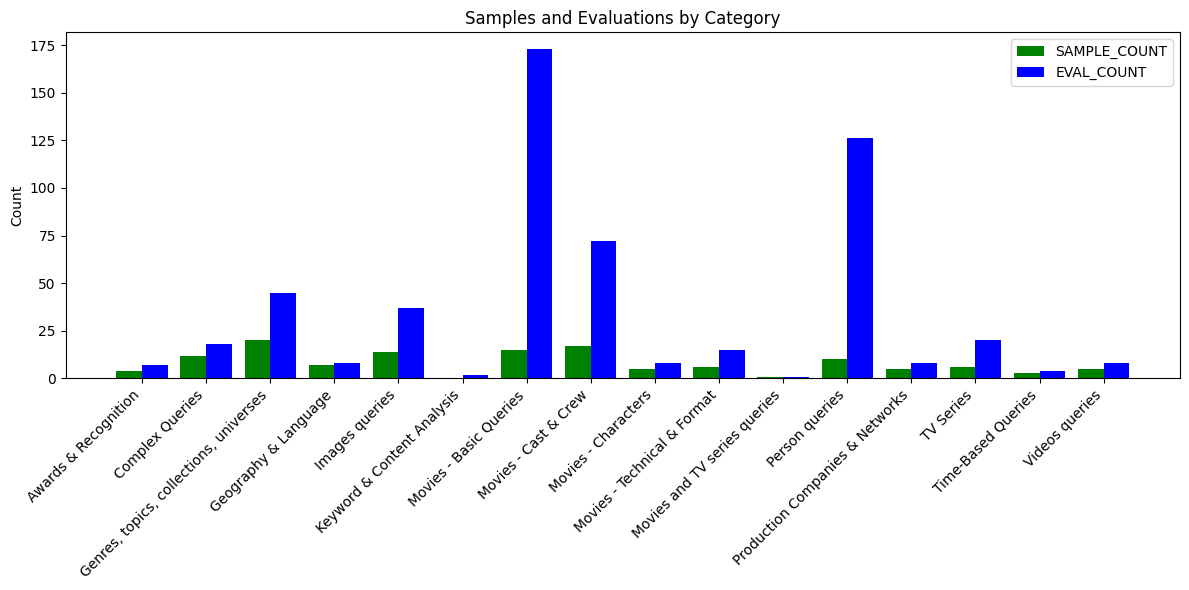

In [8]:
# Bar chart: SAMPLE_COUNT (green) and EVAL_COUNT (blue) by category description
plot_df = df[["DESCRIPTION", "SAMPLE_COUNT", "EVAL_COUNT"]].copy()
plot_df = plot_df.sort_values("DESCRIPTION")

x = range(len(plot_df))
bar_width = 0.4

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(
    [i - bar_width / 2 for i in x],
    plot_df["SAMPLE_COUNT"],
    width=bar_width,
    color="green",
    label="SAMPLE_COUNT",
)
ax.bar(
    [i + bar_width / 2 for i in x],
    plot_df["EVAL_COUNT"],
    width=bar_width,
    color="blue",
    label="EVAL_COUNT",
)

ax.set_xticks(list(x))
ax.set_xticklabels(plot_df["DESCRIPTION"], rotation=45, ha="right")
ax.set_ylabel("Count")
ax.set_title("Samples and Evaluations by Category")
ax.legend()
plt.tight_layout()
plt.show()